# Group 13 - “CA applied to the Stock Market”

In [53]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Preparations

Create network

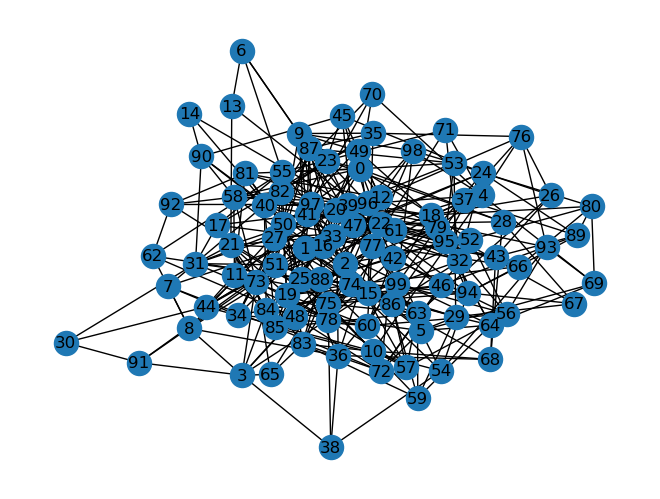

In [54]:
# parameter settings
n = 100  # nodes
p = 8 / n # probability to connect, n * p should be equal to the number 
          # of neighbors in mole field which is 8

# Use NetworkX to create RN network
ER_graph = nx.gnp_random_graph(n, p)

# Visualizing the network
nx.draw(ER_graph, with_labels=True)
plt.show()

Text(0.5, 1.0, 'Erdős_Rényi Model')

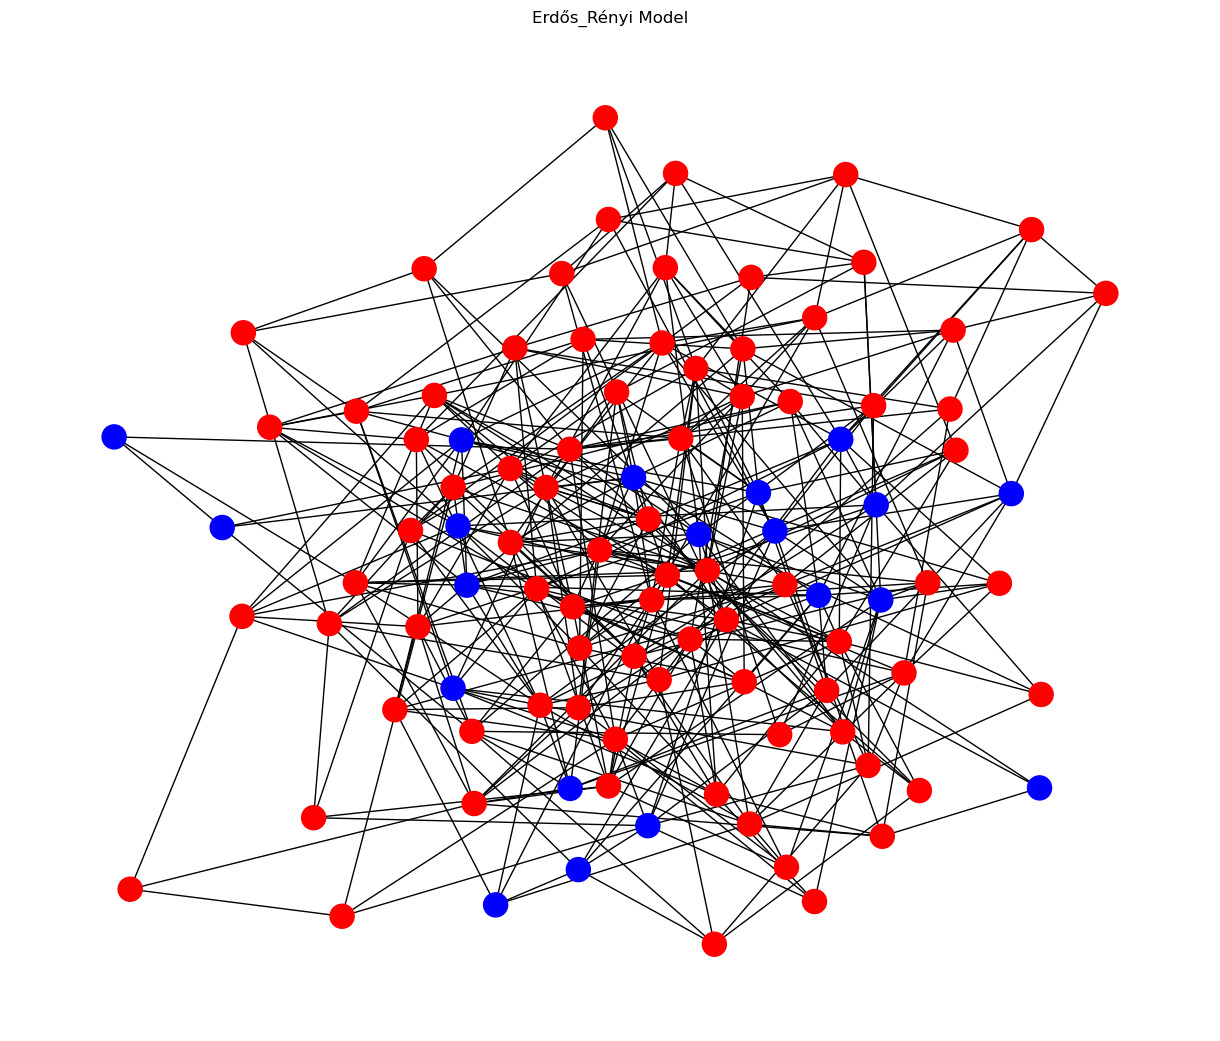

In [55]:
# Assign node type 
alpha_im = 0.2
alpha_fu = 1 - alpha_im
colors = ["blue" if i < n * alpha_im else "red" for i in range(n)] # n for the number of nodes

# 绘制Erdős–Rényi随机图
plt.figure(figsize=(12, 10))
nx.draw(ER_graph, node_color=colors, with_labels=False)
plt.title('Erdős_Rényi Model')

Create a trader class

In [107]:

class Trader:
    def __init__(self, node_id, node_color, graph, parameters):
        """
        Initialize the Trader class.
        :param node_id: Node's ID
        :param node_color: Node's color, representing the Trader's type ('blue' for Imitator, 'red' for Fundamentalist)
        :param graph: The network graph where the node is located.
        """
        self.node_id = node_id
        self.node_color = node_color
        self.type = 'Imitator' if node_color == 'blue' else 'Fundamentalist'
        self.neighbors = list(graph.neighbors(node_id))  # Get the list of neighboring nodes
        self.neighbors_count = len(self.neighbors)  # Number of neighbors
        self.parameters = parameters
        self.trade_level = parameters["trade_level"]
        self.fundamental_value = 100
        # Use normal distribute to create fundamental_values
        #self.fundamental_value = np.random.normal(100, np.sqrt(10))
        self.transaction_quantity = 0  # Initial trading volume is 0
    def fundamentalist_strategy(self, current_price, phi_fu, Mt = 0.05):
        """
        Update the trading quantity for Fundamentalist traders.
        :param current_price: Current price
        :param fundamental_value: Fundamental value
        """
        if self.trade_level == 1:
            self.transaction_quantity = self.fundamental_value - current_price
        elif self.trade_level == 3:
            self.transaction_quantity = (self.fundamental_value * (1 + self.parameters["Cfu"] * phi_fu)
            - current_price) * Mt

    def imitator_strategy(self, transaction_quantities, phi_im, Mt = 0.05):
        """
        Update the trading quantity for Imitator traders.
        :param neighbor_transactions: List of neighbor transactions
        """
        neighbor_transactions = []
        for neighbor in self.neighbors:
            neighbor_transactions.append(transaction_quantities[neighbor])
        mean_transaction_quantity = sum(neighbor_transactions) / max(1, len(neighbor_transactions))
        if self.trade_level == 1:
            self.transaction_quantity = mean_transaction_quantity
        elif self.trade_level == 3:
            self.transaction_quantity = mean_transaction_quantity * (1 + self.parameters["Cim"] * phi_im) * Mt

Class test

In [57]:
# Example: Create a Trader instance
# Assuming we have a pre-created NetworkX graph object and a list of node colors

# Choose a node ID
sample_node_id = 21
# Get the node color
sample_node_color = colors[sample_node_id]
parameters_level1 = {
        "trade_level" : 1
}
# Create a Trader instance
sample_trader = Trader(sample_node_id, sample_node_color, ER_graph, parameters_level1)

# Print information about this instance for verification
print(f"Trader ID: {sample_trader.node_id}")
print(f"Trader Type: {sample_trader.type}")
print(f"Trader Neighbor: {sample_trader.neighbors}")
print(f"Trader Neighbors Count: {sample_trader.neighbors_count}")

Trader ID: 21
Trader Type: Fundamentalist
Trader Neighbor: [1, 13, 19, 31, 33, 39, 75, 83, 85]
Trader Neighbors Count: 9


Impletement

In [58]:
# Construct a Trader object for each node in the random graph
parameters_level1 = {
        "trade_level" : 1
}
traders = [Trader(node_id, color, ER_graph, parameters_level1) for node_id, color in enumerate(colors)]

# Print the type and number of neighbors of the first 5 traders
for trader in traders[20:25]:
    print(f"Trader ID: {trader.node_id}, Type: {trader.type}, Trader Fundamental Value: {trader.fundamental_value}")


Trader ID: 20, Type: Fundamentalist, Trader Fundamental Value: 100
Trader ID: 21, Type: Fundamentalist, Trader Fundamental Value: 100
Trader ID: 22, Type: Fundamentalist, Trader Fundamental Value: 100
Trader ID: 23, Type: Fundamentalist, Trader Fundamental Value: 100
Trader ID: 24, Type: Fundamentalist, Trader Fundamental Value: 100


Update price

In [59]:
def update_price(current_price, transaction_quantities, cp, N):
    """
    Update the price based on the  Level I model.

    :param current_price: The price at the current time point
    :param transaction_quantities: List of transaction quantities for all traders at the current time point
    :param cp: Sensitivity of price to excess demand
    :param N: Number of traders
    :return: Updated price
    """
    Qt = sum(transaction_quantities)  # Calculate the total transaction quantity
    price_change = cp * Qt / N  # Calculate price change based on the rule
    new_price = current_price + price_change  # Update the price
    new_price = max(new_price, 0)  # Ensure the price doesn't go below 0
    return new_price

# Example: Update the price
current_price = 105  # Current price
cp = 0.2  # Sensitivity of price to excess demand
N = len(traders)  # Number of traders
transaction_quantities = [trader.transaction_quantity for trader in traders]  # List of transaction quantities for all traders

# Call the function to update the price
new_price = update_price(current_price, transaction_quantities, cp, N)

# Output the new price
print(f"The new price is: {new_price}")


The new price is: 105.0


## Simulate Level I model

In [60]:
#STEP 1: build network
n = 1000  # nodes
p = 8 / n # probability to connect, n * p should be equal to the number 
          # of neighbors in mole field which is 8

# Use NetworkX to create RN network
ER_graph = nx.gnp_random_graph(n, p)
alpha_ims = [0.2, 0.8]
colorsets = {} # different colorsets means different Proportions of different transaction types
for alpha_im in alpha_ims:
    alpha_fu = 1 - alpha_im
    colors = ["blue" if i < n * alpha_im else "red" for i in range(n)] # n for the number of nodes
    colorsets[alpha_im] = colors

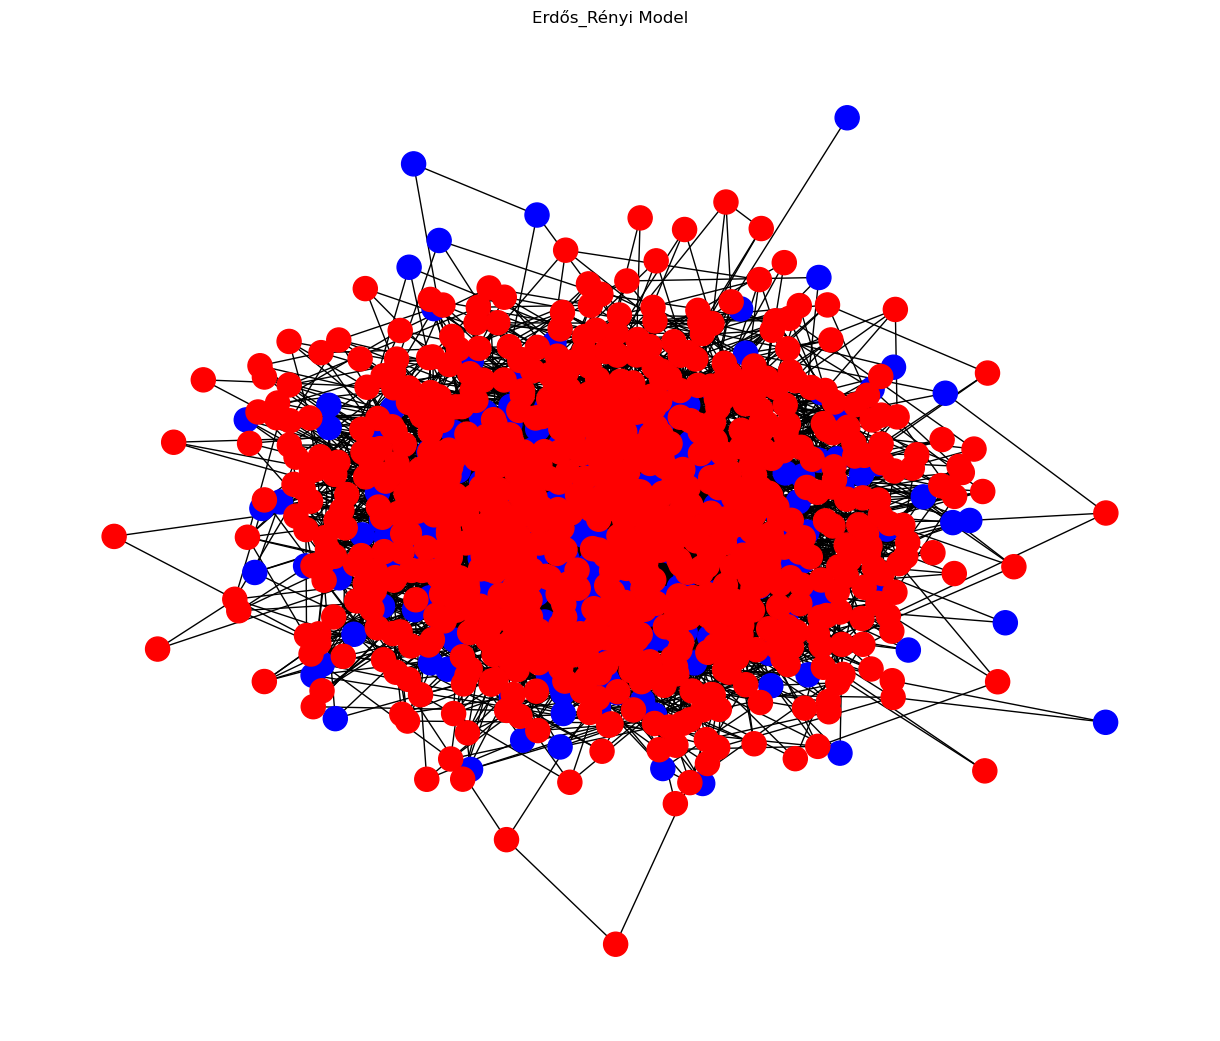

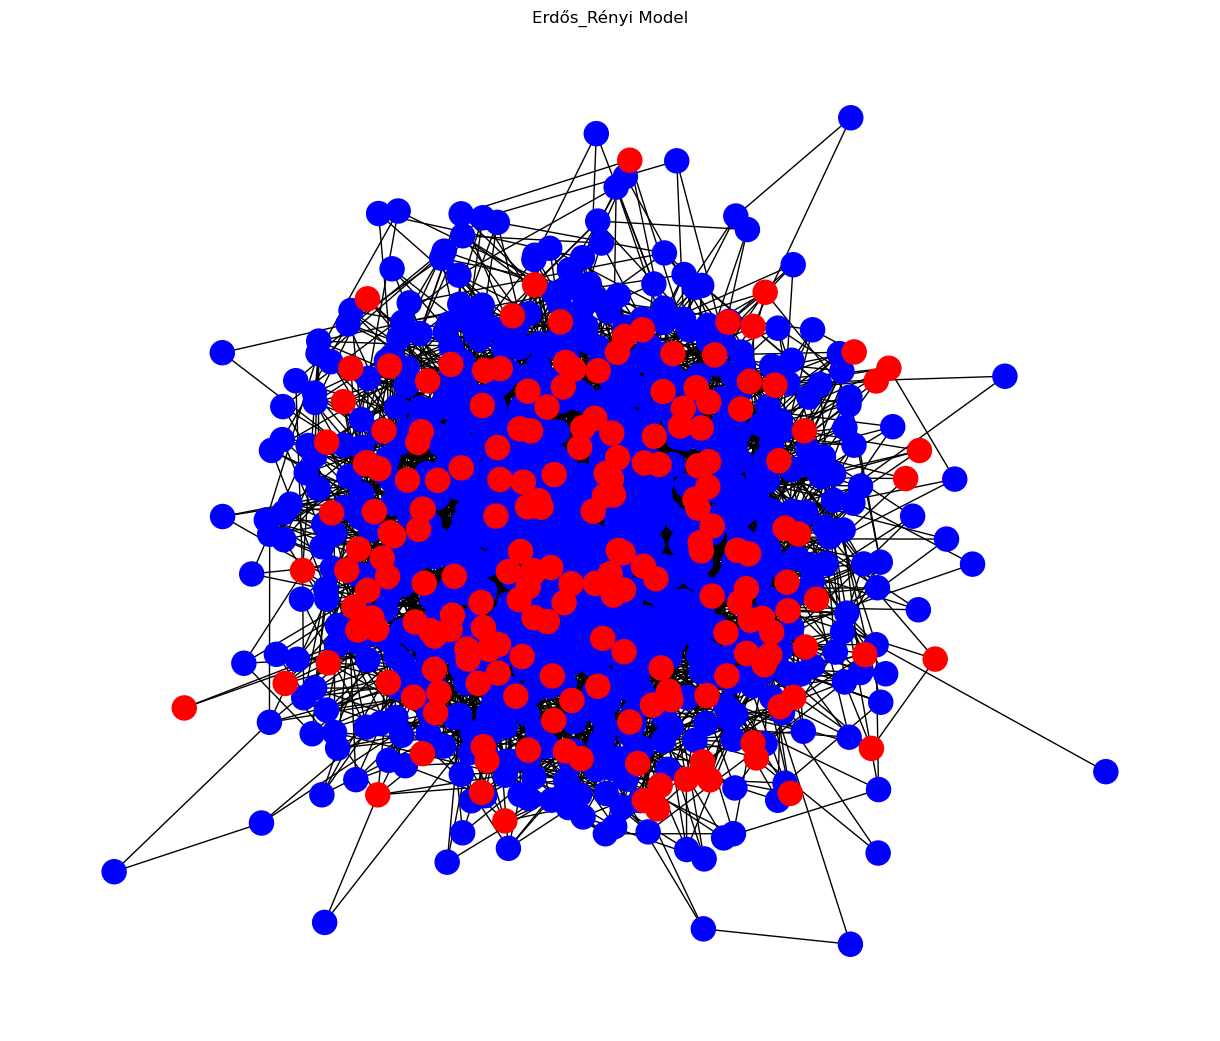

In [61]:
for colors in colorsets.values():
    # Draw Erdős–Rényi random graph
    plt.figure(figsize=(12, 10))
    nx.draw(ER_graph, node_color=colors, with_labels=False)
    plt.title('Erdős_Rényi Model')
    plt.show()

In [62]:
price_historys = {}
for key, colors in colorsets.items():
    parameters_level1 = {
        "trade_level" : 1
    }
    traders = [Trader(node_id, color, ER_graph, parameters_level1) for node_id, color in enumerate(colors)]

    cp = 0.5  # Sensitivity of price to excess demand
    N = len(traders)  # Number of traders

    total_time_steps = 100  # Total time steps
    initial_price = 105  # Initial price
    price_history = [initial_price]
    transaction_quantities = [trader.transaction_quantity for trader in traders]

    for _ in range(total_time_steps):
        # Get the current price
        current_price = price_history[-1]

        # Update traders' transaction quantities
        for trader in traders:
            # For Imitators, we update them based on their neighbors' transaction quantities
            if trader.type == 'Imitator':
                trader.imitator_strategy(transaction_quantities)  # Assuming here that neighbors already contain the corresponding trader objects
            # For Fundamentalist traders, we update them based on the current price and fundamental value
            else:
                trader.fundamentalist_strategy(current_price)

        # Calculate the new price
        transaction_quantities = [trader.transaction_quantity for trader in traders]
        new_price = update_price(current_price, transaction_quantities, cp, len(traders))

        # Update price history
        price_history.append(new_price)
    price_historys[key] = price_history


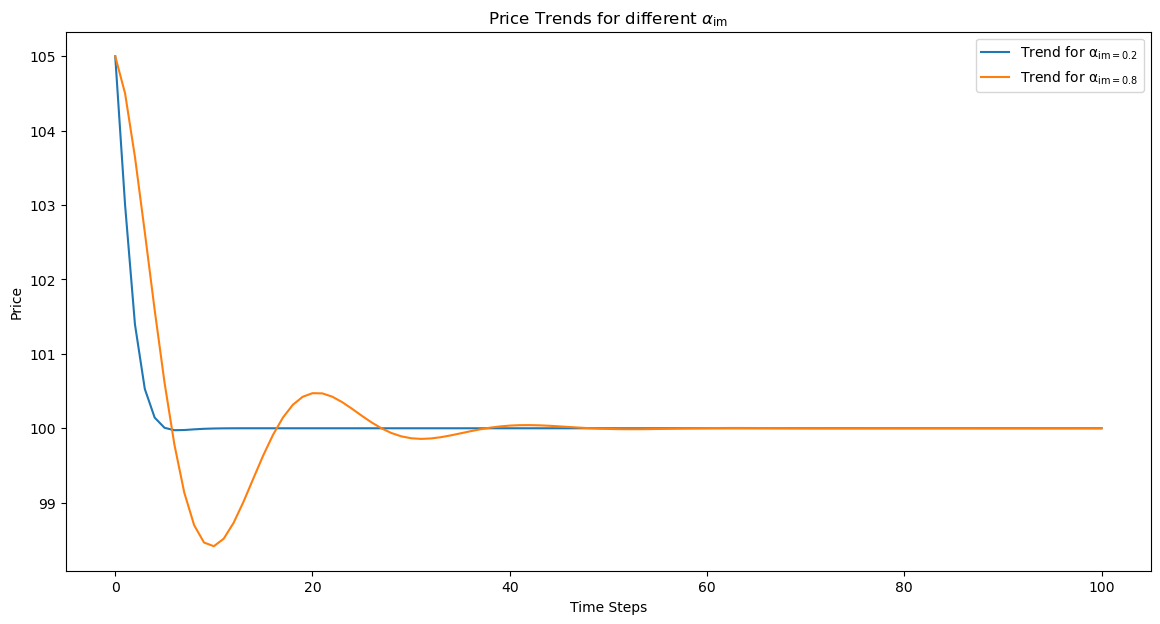

In [63]:
plt.figure(figsize=(14, 7))
for key, values in price_historys.items():
    plt.plot(values, label=r'Trend for $\mathrm{\alpha_{im=' + str(key) + '}}$')
plt.title(r'Price Trends for different $\alpha_{\mathrm{im}}$')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

## Level III model 

Corresponding Formula:  

Price fluctuation level of a stock:

$L^t=\frac{1}{k}\sum_{i=t-k}^{t-1}|P^i-\bar{P}|/\bar{P}$

Current trading activity:  

$M^t(L^t)=\begin{cases}c_lL^t,&L^t\leqslant L_m,\\c_l(-L^t+2L_m)&L^t>L_m,\end{cases}$  

$\eta_{fu}^{t}=1+c_{fu}\phi_{fu}^{t}$  

where $\phi_{fu}^{t}$ is an independent Gaussian random variable with mean 0 and standard
deviation 1 and $c_{fu}$ is a positive parameter indicating the
fundamentalists’ sensitivity to news.
Transaction quantity of fundamentalists:

$\begin{aligned}
q_{i,fu}^{t+1}& =V_{i,fu}^{t+1}M^{t+1}  \\
&=(F\eta_{fu}^{t+1}-P^{t})M^{t+1}
\end{aligned}$

Transaction quantity of imitators:

$\begin{aligned}q_{i,im}^{t+1}&=V_{i,im}^{t+1}M^{t+1}\\&=\langle V_{i,nb}^t\rangle\eta_{im}^{t+1}M^{t+1}\end{aligned}$

Price update rule:

$P^{t+1}=P^t+\frac{c_pQ^t}N$

Create network

In [64]:
#STEP 1: build network
n = 10000  # nodes
p = 8 / n # probability to connect, n * p should be equal to the number 
          # of neighbors in mole field which is 8

# Use NetworkX to create RN network
ER_graph = nx.gnp_random_graph(n, p)
alpha_ims = [0.7]
colorsets = {} # different colorsets means different Proportions of different transaction types
for alpha_im in alpha_ims:
    alpha_fu = 1 - alpha_im
    colors = ["blue" if i < n * alpha_im else "red" for i in range(n)] # n for the number of nodes
    colorsets[alpha_im] = colors

In [65]:
a = [103,101,102,101,101,101,101,101,101]
b = len(a)
c = sum(a[-b:]) / b
print(sum(abs(P_i - c) for P_i in a[-b:]) / c / b)

0.00511695906432746


Define trading activity function

In [112]:
def calculate_Lt(prices, k):
    """
    Calculate the stock price volatility level L^t.

    :param prices: Historical price array
    :param k: Number of time steps to consider
    :return: Current price volatility level
    """
    k = min(k, len(prices))
    P_bar = sum(prices[-k:]) / k  # Calculate the average price
    Lt = sum(abs(P_i - P_bar) for P_i in prices[-k:]) / P_bar / k
    return Lt

def calculate_Mt(Lt, Cl, Lm):
    """
    Calculate the current trading activity M^t.

    :param Lt: Current price volatility level
    :param Cl: Parameter
    :param Lm: Threshold
    :return: Current trading activity level
    """
    # The lower bound of Mt is 0.05
    #return np.random.normal(0.5,0.02)
    # return 1
    if Lt <= Lm:
        return max(Cl * Lt, 0.05)
    else:
        return max(Cl * (-Lt + 2 * Lm), 0.05)


Simulate

In [128]:
price_historys = {}
for key, colors in colorsets.items():
    parameters_level3 = {
        "trade_level" : 3,
        "Cl" : 20,
        "Lm" : 0.01,
        "Cfu" : 0.2,
        "Cim" : 0.7,
        "k" : 400
    }
    
    traders = [Trader(node_id, color, ER_graph, parameters_level3) for node_id, color in enumerate(colors)]
    print(0, traders[0].trade_level)

    cp = 0.3  # Sensitivity of price to excess demand
    #Parameter about calculating Mt
    k = 400 
    Cl = 20
    Lm = 0.01
    Mt = 0.05 # Init Mt
    N = len(traders)  # Number of traders

    total_time_steps = 10000  # Total time steps
    initial_price = 100  # Initial price
    price_history = [initial_price]
    transaction_quantities = [trader.transaction_quantity for trader in traders]

    for _ in range(total_time_steps):
        # Get the current price
        current_price = price_history[-1]
        phi_fu = np.random.normal(0,1)
        phi_im = np.random.normal(0,1)
        # Update traders' transaction quantities
        for trader in traders:
            # For Imitators, we update them based on their neighbors' transaction quantities
            if trader.type == 'Imitator':
                trader.imitator_strategy(transaction_quantities, phi_im, Mt)  # Assuming here that neighbors already contain the corresponding trader objects
            # For Fundamentalist traders, we update them based on the current price and fundamental value
            else:
                trader.fundamentalist_strategy(current_price, phi_fu, Mt)

        # Calculate the new price
        transaction_quantities = [trader.transaction_quantity for trader in traders]
        new_price = update_price(current_price, transaction_quantities, cp, len(traders))

        # Update price history
        price_history.append(new_price)

        # Update Mt
        Lt = calculate_Lt(price_history, k)
        Mt = calculate_Mt(Lt, Cl, Lm)
        print(Mt)
        
    price_historys[key] = price_history


0 3
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05040160018446371
0.05103884808985316
0.05180704617805937
0.05247413558480371
0.05325545253159153
0.05416910807509827
0.05483847763293517
0.055346204665362414
0.05581382331965791
0.05657929750442693
0.05751607897814104
0.058276970370298775
0.05891756804458633
0.059645306868216515
0.06011541882861759
0.060340216373096014
0.06075932239372918
0.060955856334005964
0.06115694123683112
0.061452290214307356
0.06138380924042921
0.062004781111493844
0.06260328790760722
0.06292280069663124
0.06305848429555688
0.06336459611172936
0.06331973257508731
0.06330888132053467
0.06

Price vs Steps

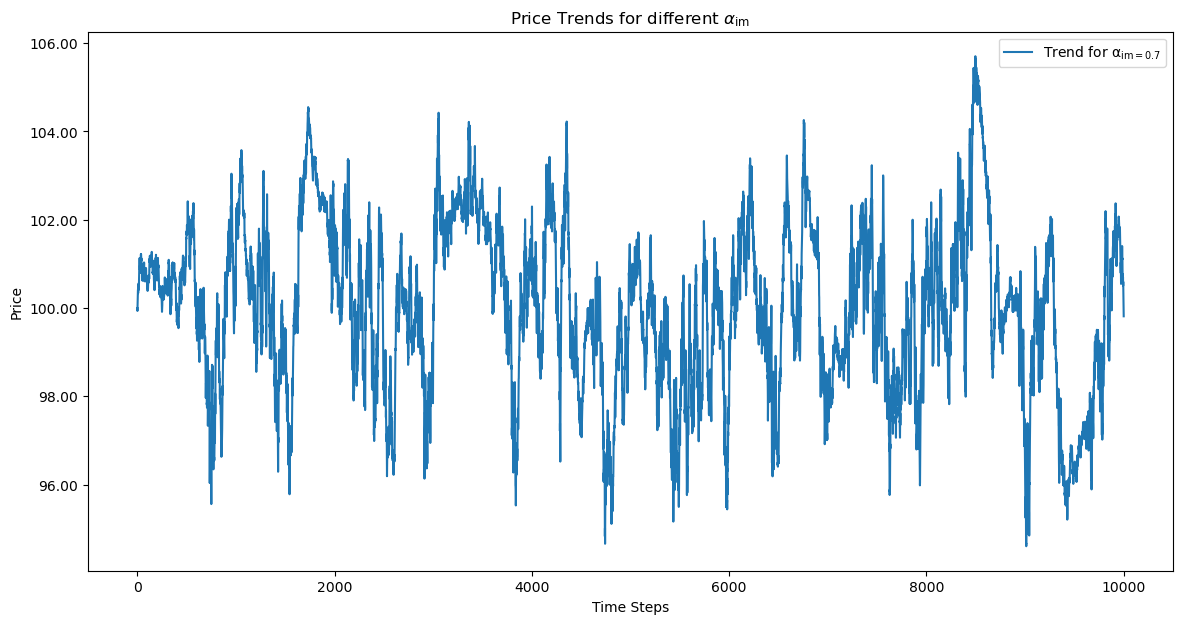

In [127]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize=(14, 7))
for key, values in price_historys.items():
    plt.plot(values, label=r'Trend for $\mathrm{\alpha_{im=' + str(key) + '}}$')
plt.title(r'Price Trends for different $\alpha_{\mathrm{im}}$')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.legend()
plt.show()

Normalized returns over time

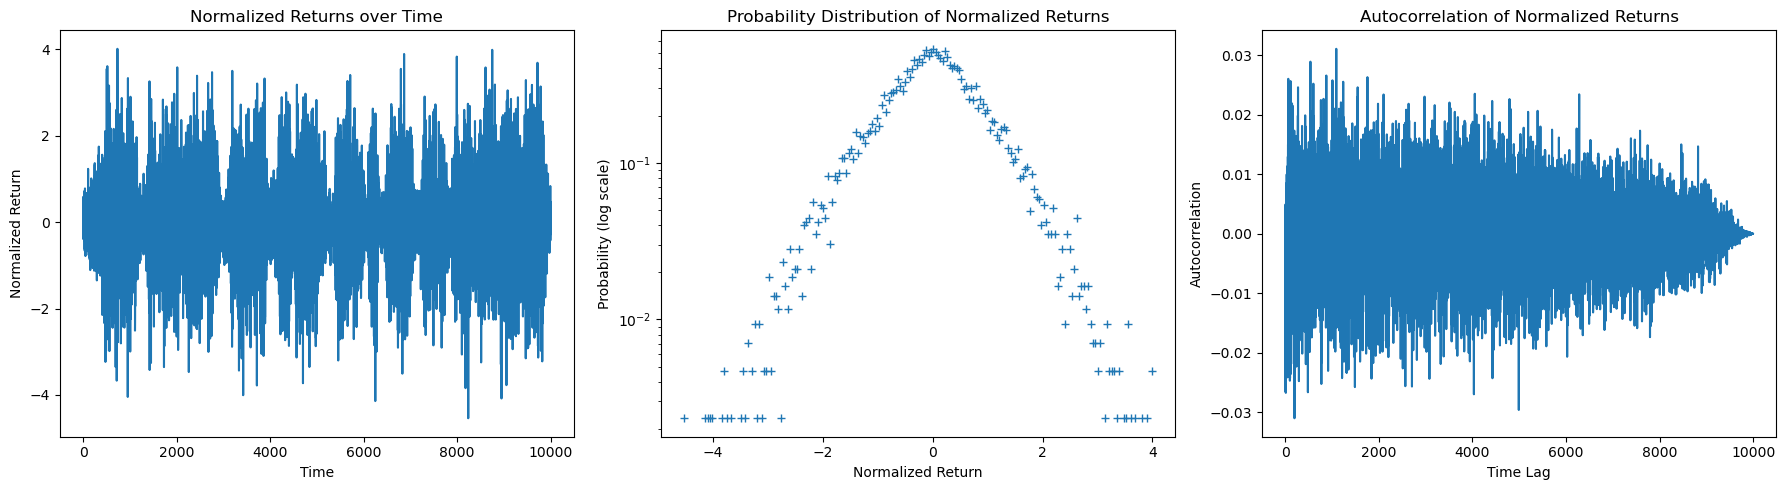

In [129]:
price_history = price_historys[0.7]
returns = np.diff(price_history)

mean_return = np.mean(returns)
std_return = np.std(returns)
normalized_returns = [(ret - mean_return) / std_return for ret in returns]

# Calculate the distribution of normalized returns
# Use more bins for higher resolution in the histogram
hist, bins = np.histogram(normalized_returns, bins=200, density=True) 
# hist - The number of intervals divided into
# bins - The boarder of the intervals
bin_centers = 0.5 * (bins[1:] + bins[:-1]) 

# Autocorrelation
autocorr_returns = np.correlate(normalized_returns, normalized_returns, mode='full')
autocorr_returns = autocorr_returns[autocorr_returns.size // 2:]
autocorr_returns /= autocorr_returns[0]
# Plot the figures
plt.figure(figsize=(18, 5))

# Plot (a) Time series of normalized returns
plt.subplot(1, 3, 1)
plt.plot(normalized_returns)
plt.xlabel('Time')
plt.ylabel('Normalized Return')
plt.title('Normalized Returns over Time')

# Plot (b) Distribution of normalized returns with only y-axis in log scale
plt.subplot(1, 3, 2)
plt.semilogy(bin_centers, hist, linestyle='None', marker='+')
plt.xlabel('Normalized Return')
plt.ylabel('Probability (log scale)')
plt.title('Probability Distribution of Normalized Returns')

# Plot (c) Autocorrelation function of returns
plt.subplot(1, 3, 3)
plt.plot(autocorr_returns[5:])
plt.xlabel('Time Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Normalized Returns')

plt.tight_layout()
plt.show()